## Assignment 1: Data Cleaning and Summarising
* Author: Mohammad Reza Hosseinzadeh s3880846
* COSC2791 Practical Data Science with Python
* Computer Science & IT, School of Science
* Royal Melbourne Institute of Technology University
* Date of Submission: 27 March 2021

## Table of Contents
* [Task 1: Data Preparation](#prep)
    * [1.1: Data Retrieving](#read)
    * [1.2: Check Data Types](#dtype)
    * [1.3: Typos](typos)
    * [1.4: Extra White-spaces](#ws)
    * [1.5: Upper/Lower-case](#case)
    * [1.6: Sanity Checks](#sanity)
    * [1.7: Missing Values](#NaN)
* [Task 2: Data Exploration](#explore)
    * [2.1: Univariate Visualisations](#univar)
        * [2.1.1: Nominal Data](#nominal)
        * [2.1.2: Ordinal Data](#ordinal)
        * [2.1.3: Numeric Data](#numeric)
    * [2.2: Bivariate Visualisations](#bi)
        * [2.2.1: Scatter Plot 'City-mpg' vs 'Price'](#sp_1)
        * [2.2.2: Scatter Plot 'Engine-size' vs 'Price'](#sp_2)
        * [2.2.3: Box Plot 'Engine-size' vs 'Price'](#bp)
    * [2.3: Scatter Matrix](#sm)

## Task 1: Data Preparation <a class="anchor" id="prep"></a>

In [1]:
# Setup: import neccessary libraries
import numpy as np      # useful for arrays and mathematical operations
import pandas as pd     # useful for retrieving and cleaning data
import matplotlib.pyplot as plt     # useful for data visualisation
import seaborn as sns       # useful for data visualisation

### 1.1: Data Retrieving <a class="anchor" id="read"></a>

In [2]:
# 1.1: Data Retrieving
# Assign column names
colnames = ['Symboling', 'Normalised-losses', 'Make', 'Fuel-type',
            'Aspiration', 'Num-of-doors', 'Body-style', 
            'Drive-wheels', 'Engine-location', 'Wheel-base', 
            'Length', 'Width', 'Height','Curb-weight', 'Engine-type', 
            'Num-of-cylinders', 'Engine-size','Fuel-system', 'Bore', 
            'Stroke', 'Compression-ratio','Horsepower', 'Peak-rpm', 
            'City-mpg', 'Highway-mpg', 'Price']
# Save dataset that was provided via Canvas to a Python object
automobile = 'Automobile.csv' 
df = pd.read_csv(automobile, sep='#', decimal='.', 
                 header=None, names=colnames)

### 1.2: Check data types <a class="anchor" id="dtype"></a>

In [3]:
# 1.2: Check data types
# Display first 4 rows of df, gives rough idea of content
df.head(4)

Symboling  Normalised-losses         Make Fuel-type Aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   

  Num-of-doors   Body-style Drive-wheels Engine-location  Wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   

   Engine-size  Fuel-system  Bore  Stroke Compression-ratio Horsepower  \
0          130         mpfi  3.47    2.68               9.0      111.0   
1          130         mpfi  3.47    2.68               9.0      111.0   
2          152         mpfi  2.68    3.47               9.0      154.0   
3          109         mpfi  3.19    3.40              10.0      102.0   

   Peak-rpm City-mpg  Highway-mpg    Price  
0    5000.0       21           27  13495.0  
1    5000.0       21           27  16500.0  
2    5000.0       19           26  16500.0  
3    5500.0       24           30  13950.0  

[4 rows x 26 columns]

In [4]:
# 1.2: Check data types
# Dispaly df info, including data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          238 non-null    int64  
 1   Normalised-losses  191 non-null    float64
 2   Make               238 non-null    object 
 3   Fuel-type          238 non-null    object 
 4   Aspiration         238 non-null    object 
 5   Num-of-doors       236 non-null    object 
 6   Body-style         238 non-null    object 
 7   Drive-wheels       238 non-null    object 
 8   Engine-location    238 non-null    object 
 9   Wheel-base         238 non-null    float64
 10  Length             238 non-null    float64
 11  Width              238 non-null    float64
 12  Height             238 non-null    float64
 13  Curb-weight        238 non-null    int64  
 14  Engine-type        238 non-null    object 
 15  Num-of-cylinders   238 non-null    object 
 16  Engine-size        238 non

In [5]:
# 1.2: Check data types
# Display dimensions of df
df.shape

(238, 26)

### 1.3: Typos <a class="anchor" id="typos"></a>

In [6]:
# 1.3: Typos
# Run for loop on all string columns in df to find spelling errors etc
str_cols = ['Make', 'Fuel-type', 'Aspiration', 'Num-of-doors',
            'Body-style', 'Drive-wheels', 'Engine-location',  
            'Engine-type', 'Num-of-cylinders', 'Fuel-system']

# Define function to display unique values of str cols
def str_unique(dataframe):
    """For loop to display all unique features of string columns"""
    for str_col in str_cols:
        print(dataframe[str_col].unique())
str_unique(df)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'Nissan' 'Peugot'
 'peugot' 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota'
 'volkswagen' 'volvo' 'volvo ' ' volvo ' 'vol00112ov']
['gas' 'diesel' 'Gas' 'Diesel' 'gas ']
['std' 'turbo' 'Std' 'std ' 'turrrrbo']
['two' 'four' nan 'Four' 'four ' 'fourR']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop' 'Sedan' 'Wagon'
 'sedan ']
['rwd' 'fwd' '4wd' 'Fwd' 'fwd ' 'rwd ']
['front' 'Front' 'FRONT' 'REAR' 'Rear' 'rear' 'front ']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'Ohc' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight' 'Four' 'five ' ' four']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi' 'Mpfi' 'mpfi ']


In [7]:
# 1.3: Typos
# Correct spelling mistakes in 'Make', 'Aspiration', 'Num-of-doors'
make_replace = {'peugot' : 'peugeot', 'Peugot': 'peugeot', 'alfa-romero' : 'alfa-romeo', 'vol00112ov' : 'volvo'}
asp_replace = {'turrrrbo': 'turbo'}
doors_replace = {'fourr': 'four'}
df = df.replace(
    {'Make': make_replace,
    'Aspiration': asp_replace,
    'Num-of-doors': doors_replace}
)       # Note: does not require inplace=True argument as we are assigning the modified DataFrame to df object

### 1.4: Extra white-space <a class="anchor" id="ws"></a> 
### 1.5: Upper/Lower case <a class="anchor" id="case"></a>

In [8]:
# 1.4 & 1.5: Extra white-space & Upper/Lower case
# Define a function to clean string cols - all upper case, remove WS
def str_clean(dataframe, colname):
    """Convert string column of data frame to all upper case and remove white space"""
    dataframe[colname] = dataframe[colname].str.strip()
    dataframe[colname] = dataframe[colname].str.upper()

# Call function and print unique features to check correction
for str_col in str_cols:
    str_clean(df, str_col)

In [9]:
# Confirm string modification worked as desired
str_unique(df)

['ALFA-ROMEO' 'AUDI' 'BMW' 'CHEVROLET' 'DODGE' 'HONDA' 'ISUZU' 'JAGUAR'
 'MAZDA' 'MERCEDES-BENZ' 'MERCURY' 'MITSUBISHI' 'NISSAN' 'PEUGEOT'
 'PLYMOUTH' 'PORSCHE' 'RENAULT' 'SAAB' 'SUBARU' 'TOYOTA' 'VOLKSWAGEN'
 'VOLVO']
['GAS' 'DIESEL']
['STD' 'TURBO']
['TWO' 'FOUR' nan 'FOURR']
['CONVERTIBLE' 'HATCHBACK' 'SEDAN' 'WAGON' 'HARDTOP']
['RWD' 'FWD' '4WD']
['FRONT' 'REAR']
['DOHC' 'OHCV' 'OHC' 'L' 'ROTOR' 'OHCF' 'DOHCV']
['FOUR' 'SIX' 'FIVE' 'THREE' 'TWELVE' 'TWO' 'EIGHT']
['MPFI' '2BBL' 'MFI' '1BBL' 'SPFI' '4BBL' 'IDI' 'SPDI']


### 1.6: Sanity checks <a class="anchor" id="sanity"></a>

In [10]:
# Sanity check 'Symboling' for values outside of expected range: -3 to 3
df[ (df['Symboling'] < -3 ) | (df['Symboling'] > 3) ]

Symboling  Normalised-losses   Make Fuel-type Aspiration Num-of-doors  \
205          4               25.0  VOLVO       GAS        STD         FOUR   
218          4               25.0  VOLVO       GAS        STD         FOUR   
231          4               25.0  VOLVO       GAS        STD         FOUR   

    Body-style Drive-wheels Engine-location  Wheel-base  ...  Engine-size  \
205      SEDAN          RWD           FRONT       109.1  ...          141   
218      SEDAN          RWD           FRONT       109.1  ...          141   
231      SEDAN          RWD           FRONT       109.1  ...          141   

     Fuel-system  Bore  Stroke Compression-ratio Horsepower  Peak-rpm  \
205         MPFI  3.78    3.15               9.5      114.0    5400.0   
218         MPFI  3.78    3.15               9.5      114.0    5400.0   
231         MPFI  3.78    3.15               9.5      114.0    5400.0   

    City-mpg  Highway-mpg    Price  
205       23           28  16845.0  
218       23           28  16845.0  
231       23           28  16845.0  

[3 rows x 26 columns]

In [11]:
# Replace 'Symboling' values of 4 with 3 as 3 is the max range given
df['Symboling'].replace(4, 3, inplace=True)

In [12]:
# Check if any values remain out of range
df[ (df['Symboling'] < -3 ) | (df['Symboling'] > 3) ].any().sum()

0

In [13]:
# Sanity check 'Normalised-losses' for values outside of expected range: 65 to 256
df[ (df['Normalised-losses'] < 65 ) | (df['Normalised-losses'] > 256) ]

Symboling  Normalised-losses   Make Fuel-type Aspiration Num-of-doors  \
205          3               25.0  VOLVO       GAS        STD         FOUR   
218          3               25.0  VOLVO       GAS        STD         FOUR   
231          3               25.0  VOLVO       GAS        STD         FOUR   

    Body-style Drive-wheels Engine-location  Wheel-base  ...  Engine-size  \
205      SEDAN          RWD           FRONT       109.1  ...          141   
218      SEDAN          RWD           FRONT       109.1  ...          141   
231      SEDAN          RWD           FRONT       109.1  ...          141   

     Fuel-system  Bore  Stroke Compression-ratio Horsepower  Peak-rpm  \
205         MPFI  3.78    3.15               9.5      114.0    5400.0   
218         MPFI  3.78    3.15               9.5      114.0    5400.0   
231         MPFI  3.78    3.15               9.5      114.0    5400.0   

    City-mpg  Highway-mpg    Price  
205       23           28  16845.0  
218       23           28  16845.0  
231       23           28  16845.0  

[3 rows x 26 columns]

In [14]:
# Summary of descriptive stats for 'Normalised-losses'
df['Normalised-losses'].describe()

count    191.000000
mean     116.863874
std       36.171118
min       25.000000
25%       94.000000
50%      104.000000
75%      145.000000
max      256.000000
Name: Normalised-losses, dtype: float64

In [15]:
# Replace out of range values of 25.0 with column wise mean value
df['Normalised-losses'].replace(25.0, df['Normalised-losses'].mean(axis=0), inplace=True)

In [16]:
# Check if any values remain out of range
df[ (df['Normalised-losses'] < 65 ) | (df['Normalised-losses'] > 256) ].any().sum()

0

In [17]:
# Sanity check 'Price' for values outside of expected range: 5118 to 45400
df[ (df['Price'] < 5118 ) | (df['Price'] > 45400) ]

Symboling  Normalised-losses   Make Fuel-type Aspiration Num-of-doors  \
210         -1               95.0  VOLVO    DIESEL      TURBO         FOUR   
211         -1               95.0  VOLVO       GAS      TURBO        FOURR   
223         -1               95.0  VOLVO    DIESEL      TURBO         FOUR   
224         -1               95.0  VOLVO       GAS      TURBO        FOURR   
236         -1               95.0  VOLVO    DIESEL      TURBO         FOUR   
237         -1               95.0  VOLVO       GAS      TURBO        FOURR   

    Body-style Drive-wheels Engine-location  Wheel-base  ...  Engine-size  \
210      SEDAN          RWD           FRONT       109.1  ...          145   
211      SEDAN          RWD           FRONT       109.1  ...          141   
223      SEDAN          RWD           FRONT       109.1  ...          145   
224      SEDAN          RWD           FRONT       109.1  ...          141   
236      SEDAN          RWD           FRONT       109.1  ...          145   
237      SEDAN          RWD           FRONT       109.1  ...          141   

     Fuel-system  Bore  Stroke Compression-ratio Horsepower  Peak-rpm  \
210          IDI  3.01    3.40              23.0      106.0    4800.0   
211         MPFI  3.78    3.15               9.5      114.0    5400.0   
223          IDI  3.01    3.40              23.0      106.0    4800.0   
224         MPFI  3.78    3.15               9.5      114.0    5400.0   
236          IDI  3.01    3.40              23.0      106.0    4800.0   
237         MPFI  3.78    3.15               9.5      114.0    5400.0   

    City-mpg  Highway-mpg  Price  
210       26           27    0.0  
211       19           25    0.0  
223       26           27    0.0  
224       19           25    0.0  
236       26           27    0.0  
237       19           25    0.0  

[6 rows x 26 columns]

In [18]:
# Summary of descriptive stats for 'Price'
df['Price'].describe()

count      234.000000
mean     13696.081197
std       8060.776465
min          0.000000
25%       7823.000000
50%      11253.500000
75%      17890.000000
max      45400.000000
Name: Price, dtype: float64

In [19]:
# Replace 'Price' vaulues of 0.0 with column wise mean value  
df['Price'].replace(0.0, df['Price'].median(axis=0), inplace=True)

In [20]:
# Check if any values remain out of range
df[ (df['Price'] < 5118 ) | (df['Price'] > 45400) ].any().sum()

0

In [21]:
# Confirm all values within expected range
df[ (df['Wheel-base'] < 86.6 ) | (df['Wheel-base'] > 120.9) ].any().sum()
df[ (df['Length'] < 141.1 ) | (df['Length'] > 208.1) ].any().sum()
df[ (df['Width'] < 60.3 ) | (df['Width'] > 72.3) ].any().sum()
df[ (df['Height'] < 47.8 ) | (df['Height'] > 59.8) ].any().sum()
df[ (df['Curb-weight'] < 1488 ) | (df['Curb-weight'] > 4066) ].any().sum()
df[ (df['Engine-size'] < 61 ) | (df['Engine-size'] > 326) ].any().sum()
df[ (df['Bore'] < 2.54 ) | (df['Bore'] > 3.94) ].any().sum()
df[ (df['Stroke'] < 2.07 ) | (df['Stroke'] > 4.17) ].any().sum()
df[ (df['Compression-ratio'] < 7 ) | (df['Compression-ratio'] > 23) ].any().sum()
df[ (df['Horsepower'] < 48 ) | (df['Horsepower'] > 288) ].any().sum()
df[ (df['Peak-rpm'] < 4150 ) | (df['Peak-rpm'] > 6600) ].any().sum()
df[ (df['City-mpg'] < 13 ) | (df['City-mpg'] > 49) ].any().sum()
df[ (df['Highway-mpg'] < 16 ) | (df['Highway-mpg'] > 54) ].any().sum()

0

### 1.7: Missing values <a class="anchor" id="NaN"></a>

In [22]:
# Check for missing values across all columns
df.isna().sum(axis=0)

Symboling             0
Normalised-losses    47
Make                  0
Fuel-type             0
Aspiration            0
Num-of-doors          2
Body-style            0
Drive-wheels          0
Engine-location       0
Wheel-base            0
Length                0
Width                 0
Height                0
Curb-weight           0
Engine-type           0
Num-of-cylinders      0
Engine-size           0
Fuel-system           0
Bore                  4
Stroke                4
Compression-ratio     0
Horsepower            2
Peak-rpm              2
City-mpg              0
Highway-mpg           0
Price                 4
dtype: int64

In [23]:
# Check description of 'Normalised-losses'
df['Normalised-losses'].describe()      #appropriate to replace NaNs with mean value

count    191.000000
mean     118.306762
std       34.249233
min       65.000000
25%       95.000000
50%      106.000000
75%      145.000000
max      256.000000
Name: Normalised-losses, dtype: float64

In [24]:
# Impute NaN in 'Normalised-losses' with column wise mean value
df['Normalised-losses'].fillna(df['Normalised-losses'].mean(axis=0), inplace=True)

In [25]:
# Check description of 'Num-of-doors'
df['Num-of-doors'].value_counts()   # Since non-numeric, can't use describe(), use value_counts() 

FOUR     144
TWO       89
FOURR      3
Name: Num-of-doors, dtype: int64

In [26]:
# Impute NaN in 'Num-of-doors' with most frequent value
df['Num-of-doors'].fillna('FOUR', inplace=True)

In [27]:
# Check description of 'Bore'
df['Bore'].describe()

count    234.000000
mean       3.361282
std        0.290631
min        2.540000
25%        3.150000
50%        3.350000
75%        3.620000
max        3.940000
Name: Bore, dtype: float64

In [28]:
# Impute NaN in 'Bore' with column wise mean value
df['Bore'].fillna(df['Bore'].mean(axis=0), inplace=True)

In [29]:
# Check description of 'Stroke'
df['Stroke'].describe()

count    234.000000
mean       3.243120
std        0.301348
min        2.070000
25%        3.112500
50%        3.270000
75%        3.400000
max        4.170000
Name: Stroke, dtype: float64

In [30]:
# Impute NaN in 'Stroke' with column wise mean value
df['Stroke'].fillna(df['Stroke'].mean(axis=0), inplace=True)

In [31]:
# Check description for 'Horsepower'
df['Horsepower'].describe()

count    236.000000
mean     107.152542
std       38.288297
min       48.000000
25%       75.250000
50%      102.000000
75%      121.000000
max      288.000000
Name: Horsepower, dtype: float64

In [32]:
# Impute NaN in 'Horsepower' with mean value
df['Horsepower'].fillna(df['Horsepower'].mean(axis=0), inplace=True)

In [33]:
# Check description for 'Peak-rpm'
df['Peak-rpm'].describe()

count     236.000000
mean     5140.889831
std       456.806273
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: Peak-rpm, dtype: float64

In [34]:
# Impute NaN in 'Peak-rpm' with the mean value
df['Peak-rpm'].fillna(df['Peak-rpm'].mean(axis=0), inplace=True)

In [35]:
# Check description for 'Price'
df['Price'].describe()

count      234.000000
mean     13984.632479
std       7759.876281
min       5118.000000
25%       7980.000000
50%      11256.250000
75%      17890.000000
max      45400.000000
Name: Price, dtype: float64

In [36]:
# Impute NaN in 'Price' with the median value (distribution is right-skewed)
df['Price'].fillna(df['Price'].median(axis=0), inplace=True)

In [37]:
# Check imputation of NaN worked correctly, should have 0 NaN
df.isna().sum(axis=0)

Symboling            0
Normalised-losses    0
Make                 0
Fuel-type            0
Aspiration           0
Num-of-doors         0
Body-style           0
Drive-wheels         0
Engine-location      0
Wheel-base           0
Length               0
Width                0
Height               0
Curb-weight          0
Engine-type          0
Num-of-cylinders     0
Engine-size          0
Fuel-system          0
Bore                 0
Stroke               0
Compression-ratio    0
Horsepower           0
Peak-rpm             0
City-mpg             0
Highway-mpg          0
Price                0
dtype: int64

### Additional step: Drop duplicates

This step is not part of the tasks. However, I wanted the dataset clean from duplicate rows.

In [38]:
# Find how many duplicate rows in dataset 
df.duplicated().sum()

28

In [39]:
# Remove duplicate rows, exceot for the first occurance
df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [40]:
# View dimensions of clean DataFrame 
df.shape

(210, 26)

## Task 2: Data Exploration <a class="anchor" id="explore"></a>

### 2.1: Univariate visualisation <a class="anchor" id="univar"></a>

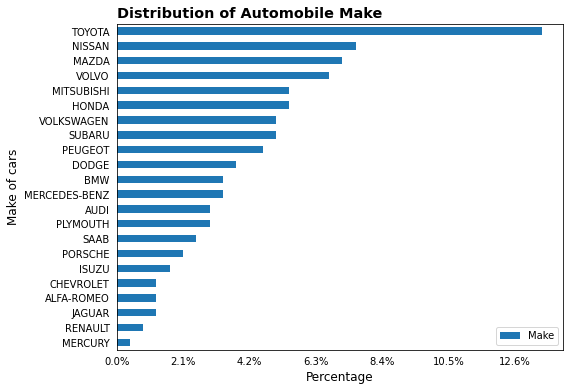

In [41]:
# 2.1.1: Nominal data <a class="anchor" id="nominal"></a>
# Bar chart of nominal data 'Make' - x-axis formatted to show percentages
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(8,6), ncols=1, nrows=1)
df['Make'].value_counts().sort_values().plot(kind='barh', label='Make') # .sort_values() will sort from high to low
plt.title('Distribution of Automobile Make', loc='left', fontsize='x-large', fontweight='bold')
plt.xlabel('Percentage', fontsize='large')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=238))  #Format x-axis to percentages
plt.ylabel('Make of cars', fontsize='large')
plt.legend()
plt.tick_params(axis='both', labelsize='medium', bottom=False, left=False)
plt.show()

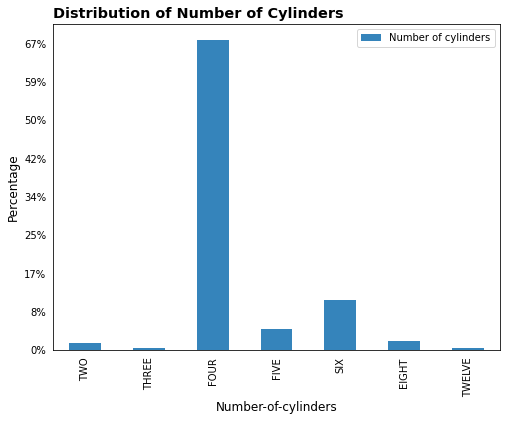

In [42]:
# 2.1.2: Ordinal data <a class="anchor" id="ordinal"></a>
# Bar chart of ordinal data 'Num-of-cylinders' - x-axis formatted to show percentages
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(8,6), ncols=1, nrows=1)
df_copy = df.copy() #create copy of original df
ordered_cyl = ['TWO', 'THREE', 'FOUR', 'FIVE', 'SIX', 'EIGHT', 'TWELVE']    #list of 'Num-of-cylinder' ordered from low to highest
cyl_series = df_copy['Num-of-cylinders'].value_counts().loc[ordered_cyl]
cyl_series.plot(kind='bar', label='Number of cylinders', alpha=0.9)
plt.title('Distribution of Number of Cylinders', loc='left', fontsize='x-large', fontweight='bold')
plt.xlabel('Number-of-cylinders', fontsize='large')
plt.ylabel('Percentage', fontsize='large')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=238))  #Format yaxis to percentages
plt.tick_params(axis='both', labelsize='medium', bottom=False, left=False)
plt.legend()
plt.show()

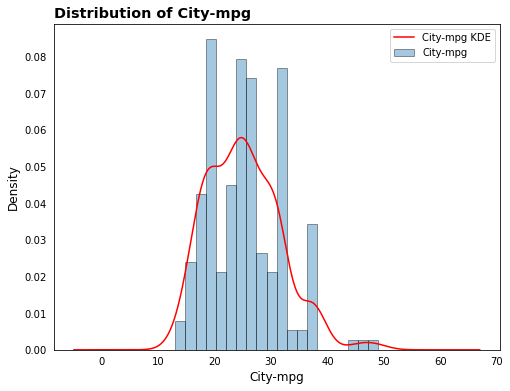

In [43]:
# 2.1.3: Numeric data <a class="anchor" id="numeric"></a>
# Histogram of numerical data with KDE: 'City-mpg'
fig, ax = plt.subplots(figsize=(8,6), ncols=1, nrows=1)    # get the figure and axes objects
df['City-mpg'].plot(kind='hist', bins=20, density=True, edgecolor='black', linewidth=1, label='City-mpg', alpha=0.4)
df['City-mpg'].plot(kind='kde', color='red', label='City-mpg KDE')    # draw Kernel Density Estimate plot
plt.title('Distribution of City-mpg', loc='left', fontsize='x-large', fontweight='bold')
plt.xlabel('City-mpg', fontsize='large')
plt.ylabel('Density', fontsize='large')
plt.tick_params(axis='both', labelsize='medium', bottom=False, left=False)
plt.legend()
plt.show()

### 2.2: Relationship between columns <a class="anchor" id="bi"></a>

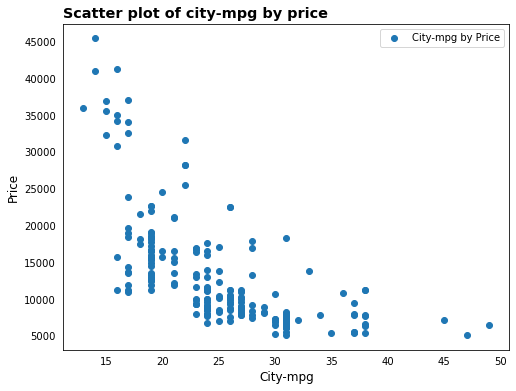

In [44]:
# 2.2.1: Relationship between 'City-mpg' and 'Price' <a class="anchor" id="sp_1"></a> 
# Scatter plot since both are numeric features
fig, ax = plt.subplots(figsize=(8,6), ncols=1, nrows=1)
plt.scatter(x='City-mpg', y='Price', data=df, label='City-mpg by Price')
plt.title('Scatter plot of city-mpg by price', loc='left', fontsize='x-large', fontweight='bold')
plt.xlabel('City-mpg', fontsize='large')
plt.ylabel('Price', fontsize='large')
plt.tick_params(axis='both', labelsize='medium', bottom=False, left=False)
plt.legend()
plt.show() 

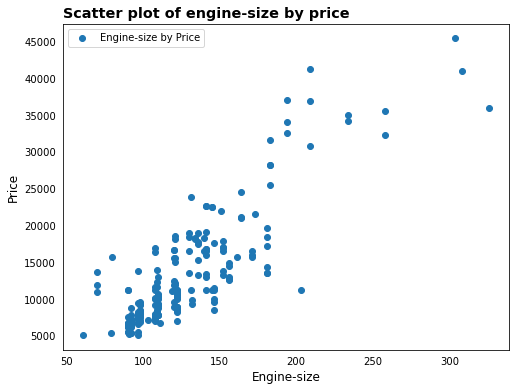

In [45]:
# 2.2.2: Relationship between 'Engine-size' and 'Price' <a class="anchor" id="sp_2"></a>
# Scatter plot since both are numeric features
fig, ax = plt.subplots(figsize=(8,6), ncols=1, nrows=1)
plt.scatter(x='Engine-size', y='Price', data=df, label='Engine-size by Price')
plt.title('Scatter plot of engine-size by price', loc='left', fontsize='x-large', fontweight='bold')
plt.xlabel('Engine-size', fontsize='large')
plt.ylabel('Price', fontsize='large')
plt.tick_params(axis='both', labelsize='medium', bottom=False, left=False)
plt.legend()
plt.show()

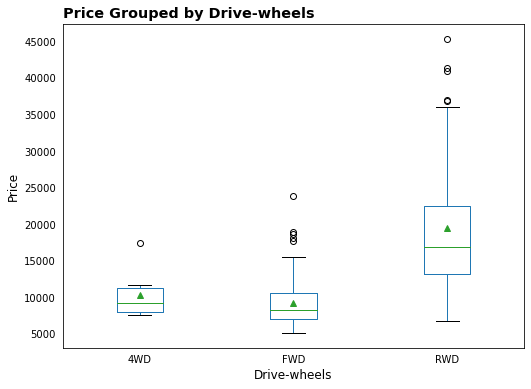

In [46]:
# 2.2.3: Relationship between 'Drive-wheels' and 'Price' <a class="anchor" id="bp"></a>  
# Boxplot of price separated by the categorical feature
df.boxplot(column='Price', by='Drive-wheels', showmeans=True, figsize=(8,6), grid=False)
plt.suptitle('')    # removes auto generated title
plt.title('')       # removes auto generated title
plt.title('Price Grouped by Drive-wheels', loc='left', fontsize='x-large', fontweight='bold')
plt.ylabel('Price', fontsize='large')
plt.xlabel('Drive-wheels', fontsize='large')
plt.tick_params(axis='both', labelsize='medium', bottom=False, left=False)
plt.show()

### 2.3: Scatter matrix <a class="anchor" id="sm"></a>

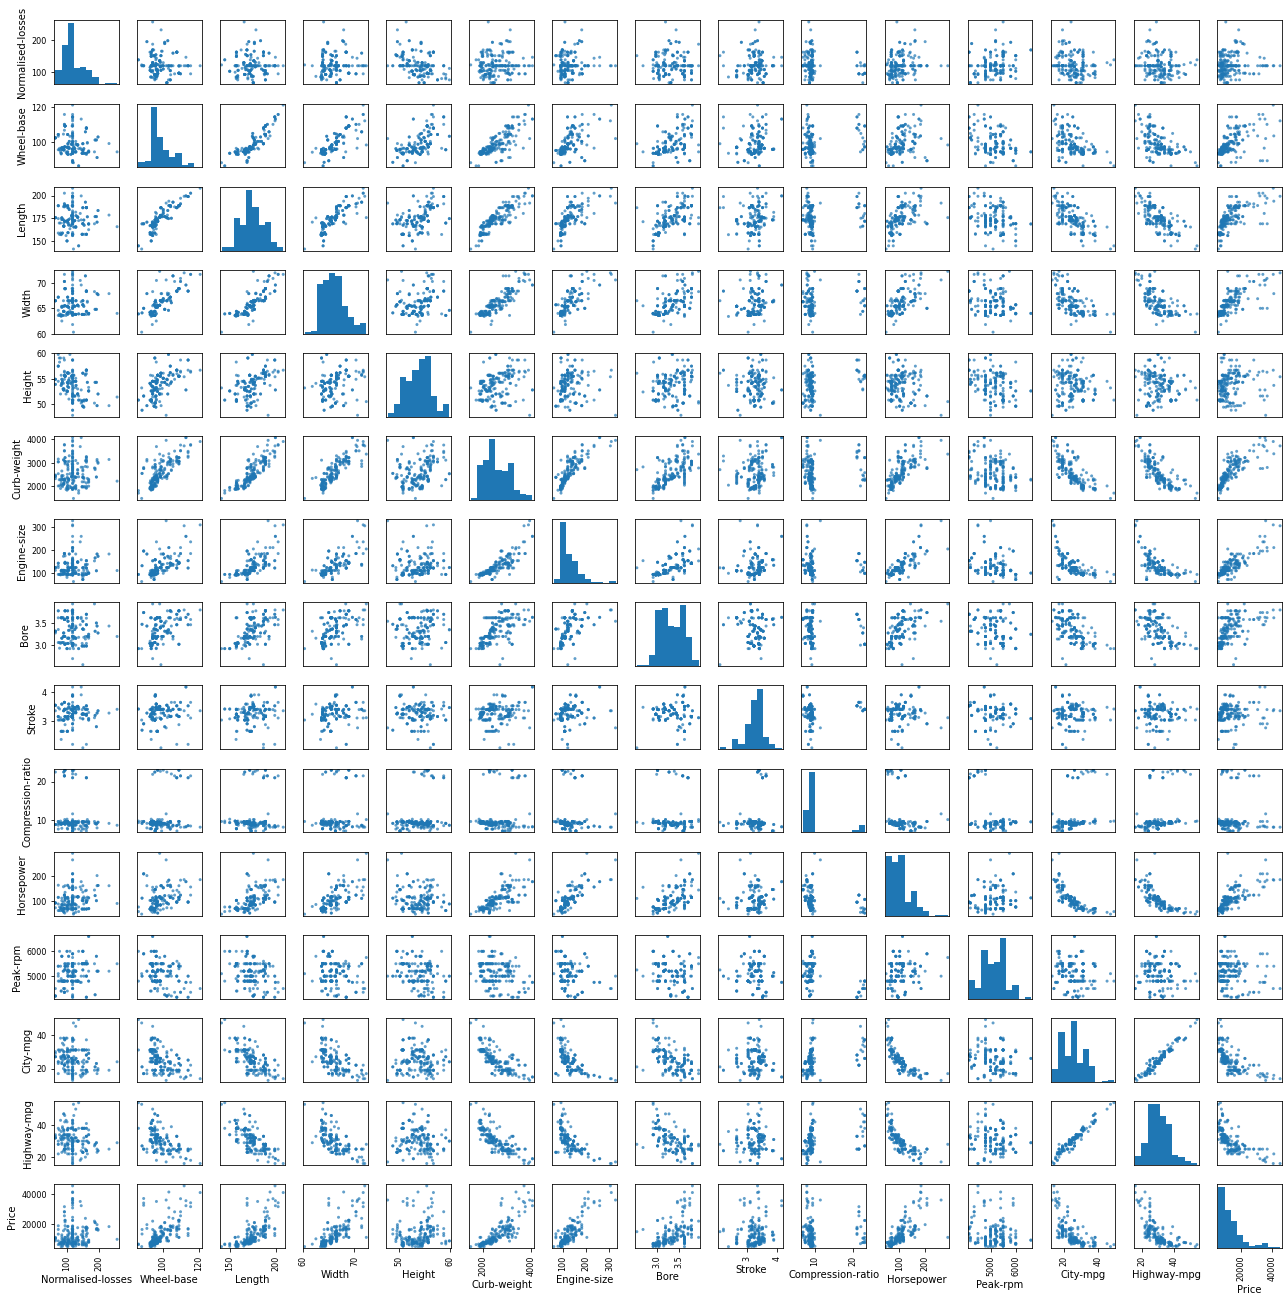

In [47]:
# 2.3: Scatter Matrix for all numeric columns 
from pandas.plotting import scatter_matrix
numerics = df.iloc[:, [1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24, 25]]   #numeric columns
scatter_matrix(numerics, alpha=0.7, figsize=(20,20), diagonal='hist')
plt.tight_layout()
plt.show()